In [22]:
import numpy as np
from matplotlib import pyplot as plt
from utils import red_transparent_blue
import sys
import torch

sys.path.append('E:/Projects/XAI/BHEM')
sys.path.append('/run/media/xiangyu/Data/Projects/XAI/BHEM')

from utils import red_transparent_blue

import torch.nn.functional as F

In [23]:
from model import Cnn, getClassifier
from dataset import handwriting
torch.manual_seed(0)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
cnn = getClassifier(Cnn, device, f_params='./MINST.pkl')
# %% Load MINST dataset
mnist = handwriting('mnist_784', normalize=True)

In [24]:
img_ID = 5

In [25]:
exp_result = np.load(f'./result/bhem/result_array_{img_ID}.npy', allow_pickle=True)
y = mnist.y[img_ID]
y

2

In [26]:
exp_result.shape

(1, 10, 14, 14)

In [27]:
for i in range(10):
    print(exp_result[:,i].sum())

-0.04258494650582324
-0.2209711564368279
0.7814051136995142
-0.17220127077939262
-0.08293403009495648
0.044848526011703006
-0.05026134831827572
-0.10716350925414023
-0.09580996284512788
-0.05432738342027075


In [28]:
exp_result.sum()

3.205640242143204e-08

In [29]:
exp_result[0,y].sum()

0.7814051136995142

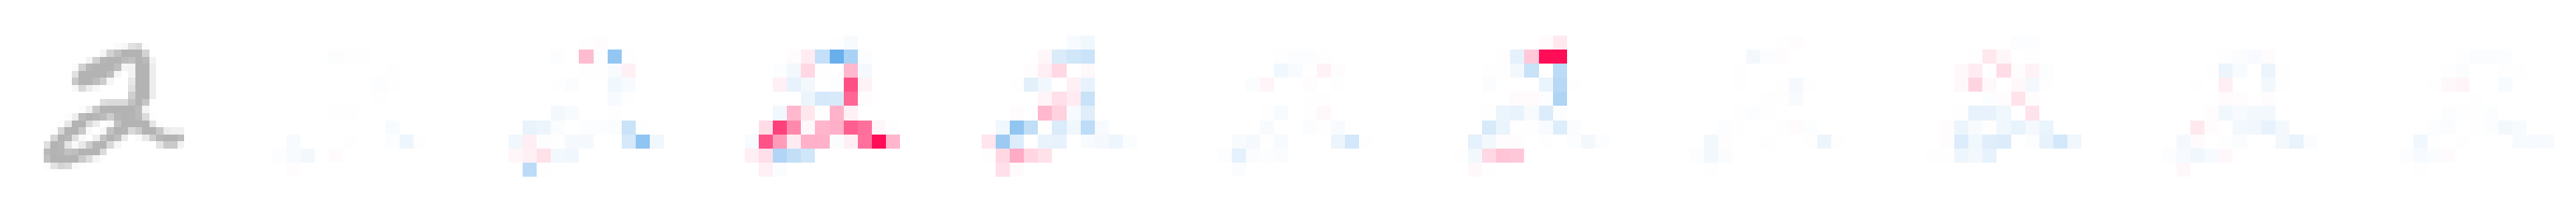

In [30]:
exp_result = np.array(exp_result, dtype=float)  # Convert to numeric type

plt.figure(figsize=(40, 10))
for i in range(11):
    plt.subplot(1, 11, i+1)
    if i == 0:
        plt.imshow(mnist.X[img_ID].reshape(28, 28), cmap='gray_r', alpha=0.3)
        plt.axis('off')
        continue
    else:
        # plt.imshow(mnist.X[img_ID].reshape(28, 28), cmap='gray_r', alpha=0.3)
        plt.imshow(exp_result[0][i-1], cmap=red_transparent_blue, vmin=-np.nanpercentile(exp_result[0], 99.9),vmax=np.nanpercentile(exp_result[0], 99.9))
        plt.axis('off')

In [31]:
resized_images = F.interpolate(torch.tensor(exp_result), size=(28, 28), mode='bilinear', align_corners=False).numpy()/4

In [32]:
resized_images[0,y].sum(), exp_result[0,y].sum()

(0.7814051136995142, 0.7814051136995142)

# Fake layer 5

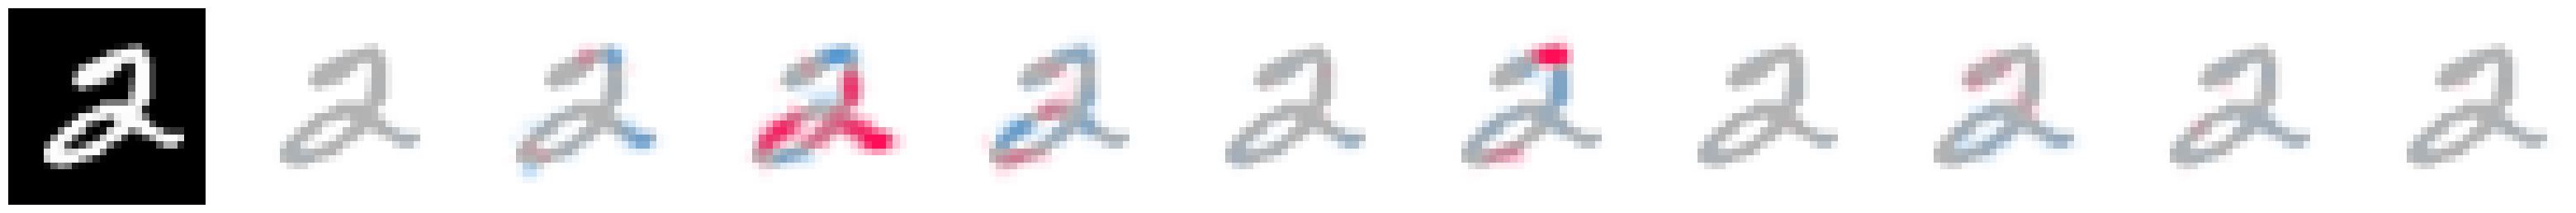

In [33]:
plt.figure(figsize=(40, 10))
for i in range(11):
    plt.subplot(1, 11, i+1)
    if i == 0:
        plt.imshow(mnist.X[img_ID].reshape(28, 28), cmap='gray')
        plt.axis('off')
        continue
    else:
        plt.imshow(mnist.X[img_ID].reshape(28, 28), cmap='gray_r', alpha=0.3)
        plt.imshow(resized_images[0][i-1], cmap=red_transparent_blue, vmin=-np.nanpercentile(resized_images[0], 99.9),vmax=np.nanpercentile(resized_images[0], 99.9))
        plt.axis('off')

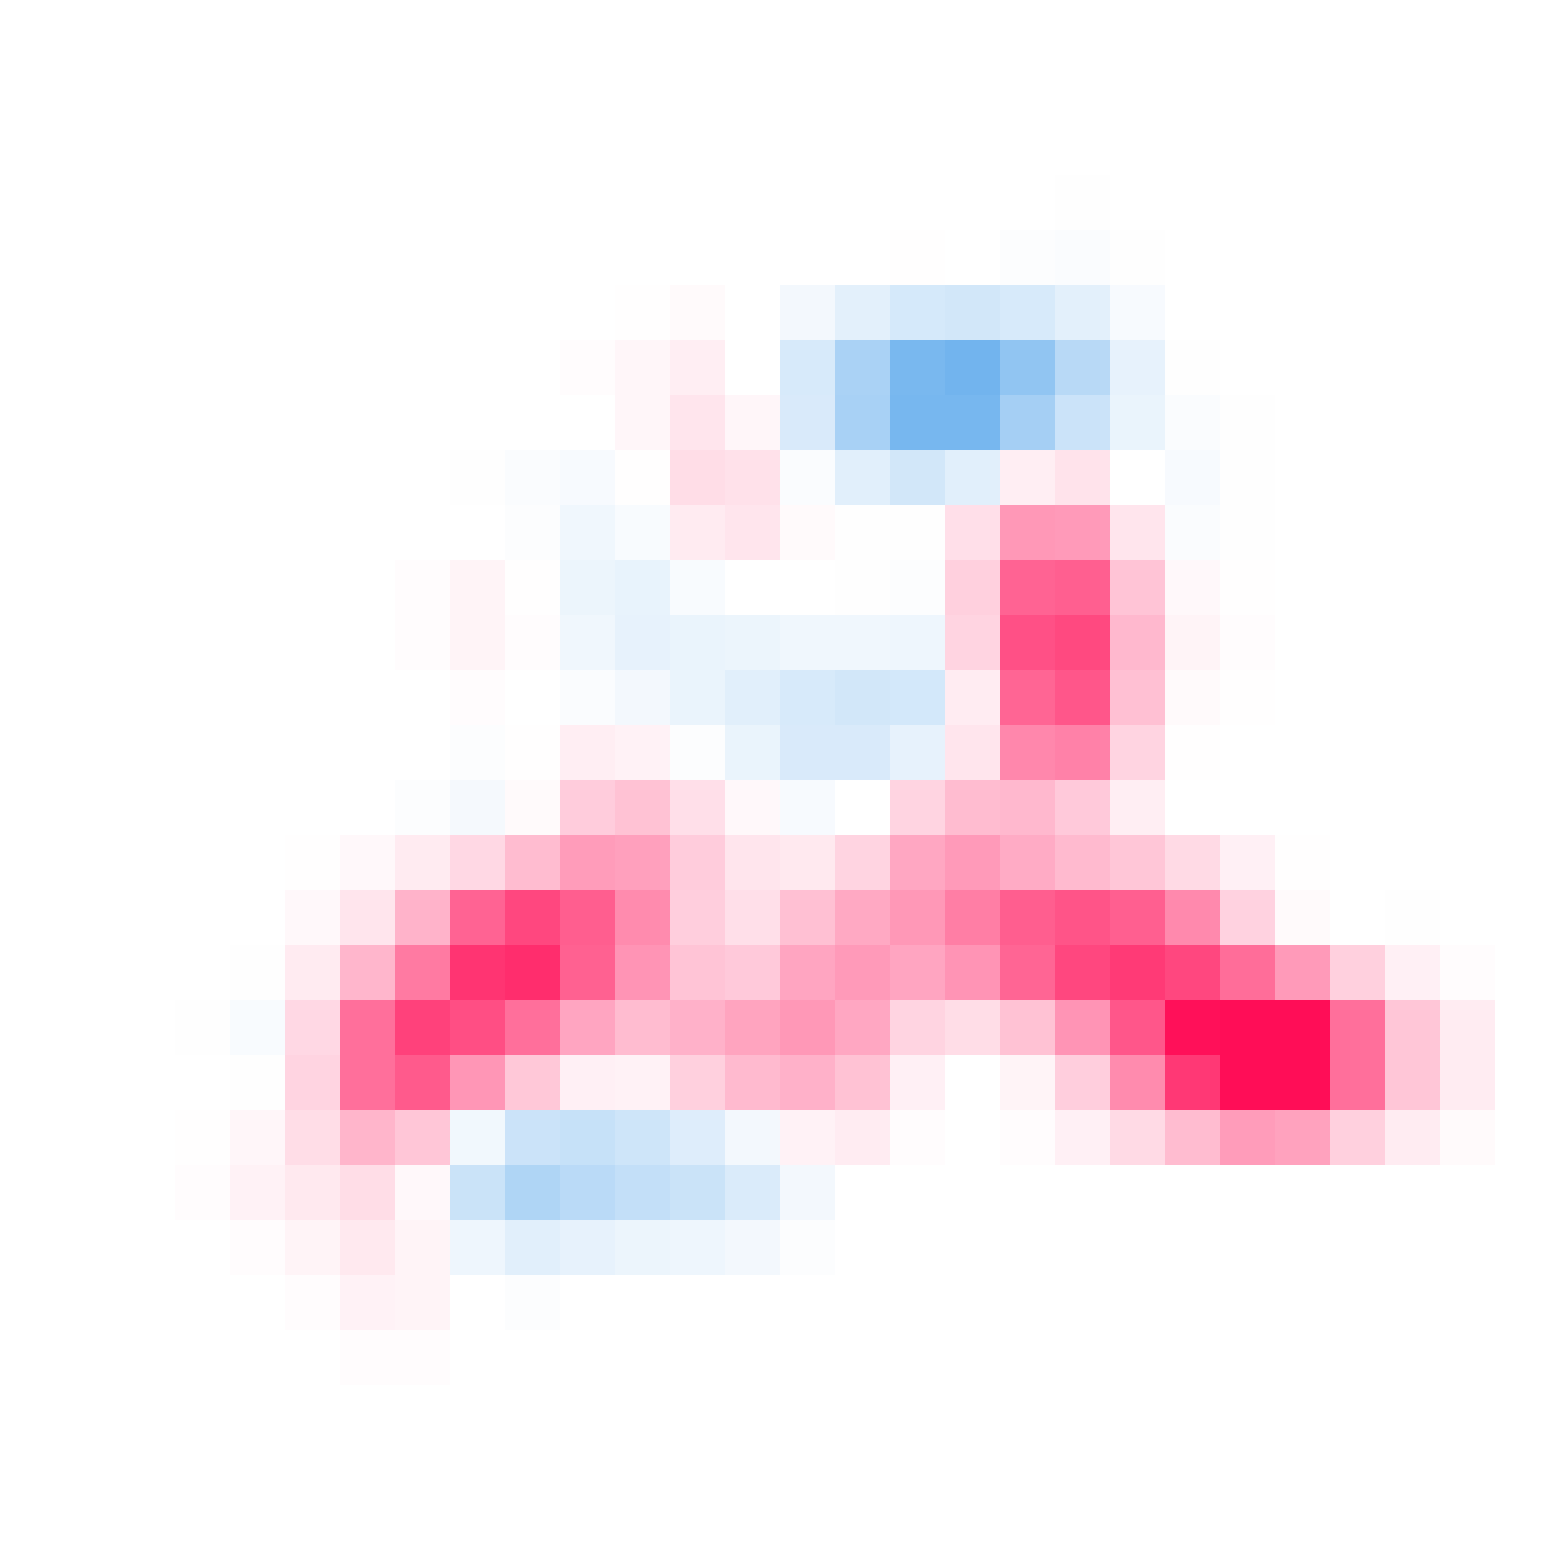

In [63]:
plt.figure(figsize=(20, 20))
plt.imshow(resized_images[0][2], cmap=red_transparent_blue, vmin=-np.nanpercentile(resized_images[0], 99.9),vmax=np.nanpercentile(resized_images[0], 99.9))
plt.axis('off')
plt.savefig('layer5.svg')

# Real Layer 5 (same as layer 4)

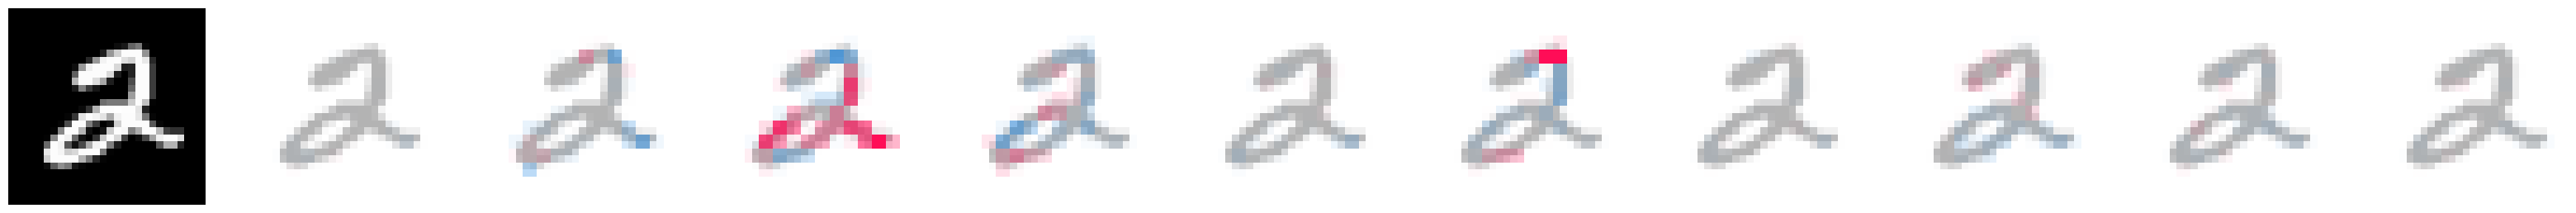

In [18]:
plt.figure(figsize=(40, 10))
for i in range(11):
    plt.subplot(1, 11, i+1)
    if i == 0:
        plt.imshow(mnist.X[img_ID].reshape(28, 28), cmap='gray')
        plt.axis('off')
        continue
    else:
        plt.imshow(mnist.X[img_ID].reshape(28, 28), cmap='gray_r', alpha=0.3)
        test_img = np.kron(exp_result[0][i-1], np.ones((2, 2)))
        plt.imshow(test_img, cmap=red_transparent_blue, vmin=-np.nanpercentile(exp_result[0], 99.9),vmax=np.nanpercentile(exp_result[0], 99.9))
        plt.axis('off')

In [ ]:
test_image = np.kron(exp_result[0][2], np.ones((2, 2)))
plt.figure(figsize=(20, 20))
plt.imshow(test_image, cmap=red_transparent_blue, vmin=-np.nanpercentile(exp_result[0], 99.9),vmax=np.nanpercentile(exp_result[0], 99.9))
plt.axis('off')
plt.savefig('layer4.svg')

# Layer 3

In [42]:
import numpy as np

# Reshape the image into 7x7 blocks
blocks = test_image.reshape(7, 4, 7, 4).sum(axis=(1, 3))/4

# Verify the shape of the resulting image
print(blocks.shape)

(7, 7)


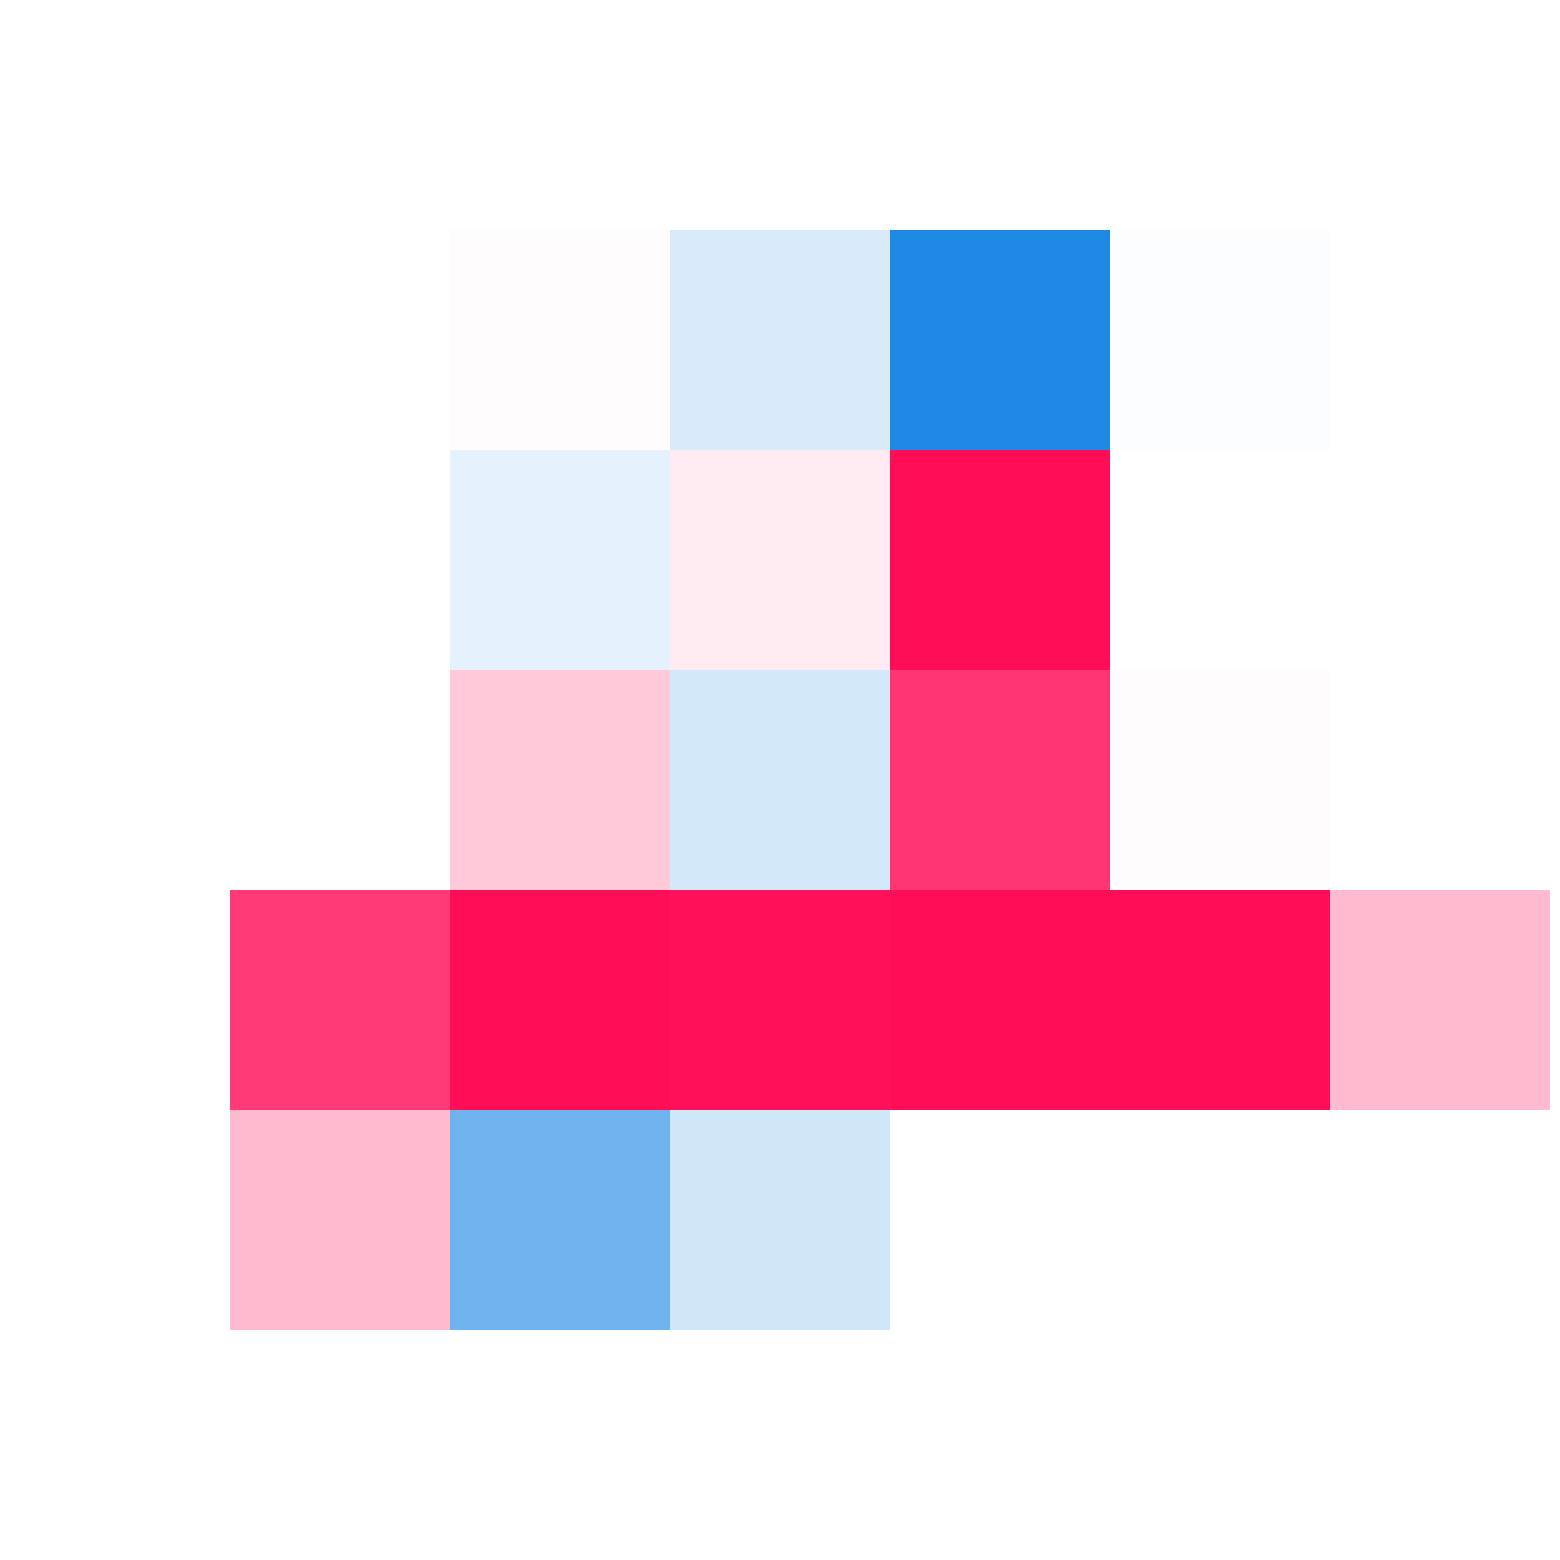

In [44]:
plt.figure(figsize=(20, 20))
plt.imshow(blocks, cmap=red_transparent_blue, vmin=-np.nanpercentile(exp_result[0], 99.9),vmax=np.nanpercentile(exp_result[0], 99.9))
plt.axis('off')
plt.savefig('layer3.svg')

# Layer 2

In [45]:
blocks.shape

(7, 7)

In [55]:
value1, value2, value3 = blocks[0:2, 0:2].sum(), blocks[0:2, 2:5].sum(), blocks[0:2, 5:7].sum()
value4, value5, value6 = blocks[2:5, 0:2].sum(), blocks[2:5, 2:5].sum(), blocks[2:5, 5:7].sum()
value7, value8, value9 = blocks[5:7, 0:2].sum(), blocks[5:7, 2:5].sum(), blocks[5:7, 5:7].sum()

In [56]:
import numpy as np

values = np.array([[value1, value2, value3],
                   [value4, value5, value6],
                   [value7, value8, value9]])

[[ 0.         -0.03166364 -0.00042682]
 [ 0.02126909  0.1460771   0.0751121 ]
 [ 0.00731037 -0.02232692  0.        ]]


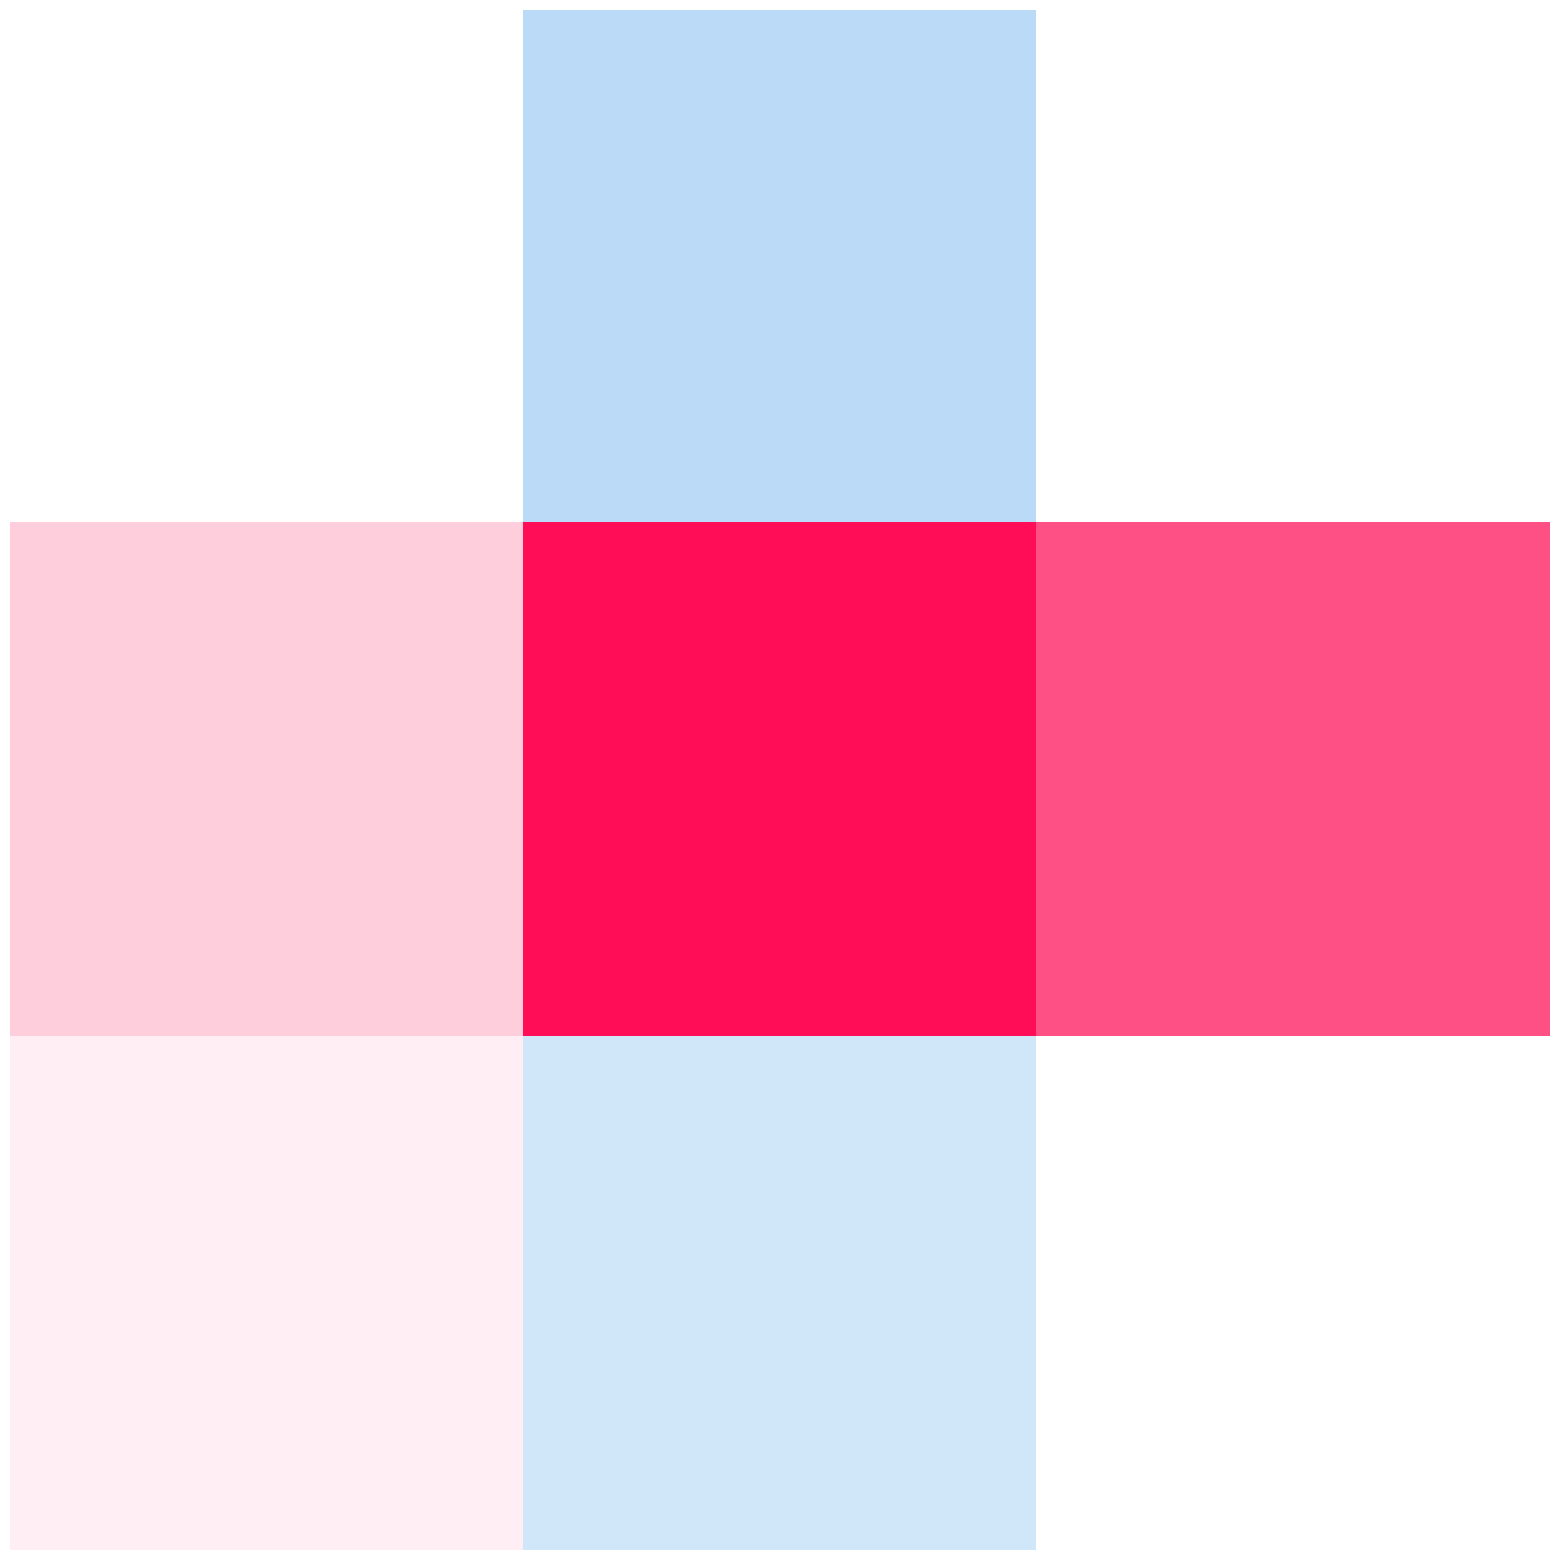

In [58]:
plt.figure(figsize=(20, 20))
plt.imshow(values, cmap=red_transparent_blue, vmin=-np.nanpercentile(exp_result[0], 99.9),vmax=np.nanpercentile(exp_result[0], 99.9))
plt.axis('off')
plt.savefig('layer2.svg')

# Layer 1

In [59]:
val1, val2, val3 = values[0:2, 0].sum(), values[0:2, 1].sum(), values[0:2, 2].sum()

In [60]:
val = np.array([[val1, val2, val3],
                [val1, val2, val3],
                [val1, val2, val3]])

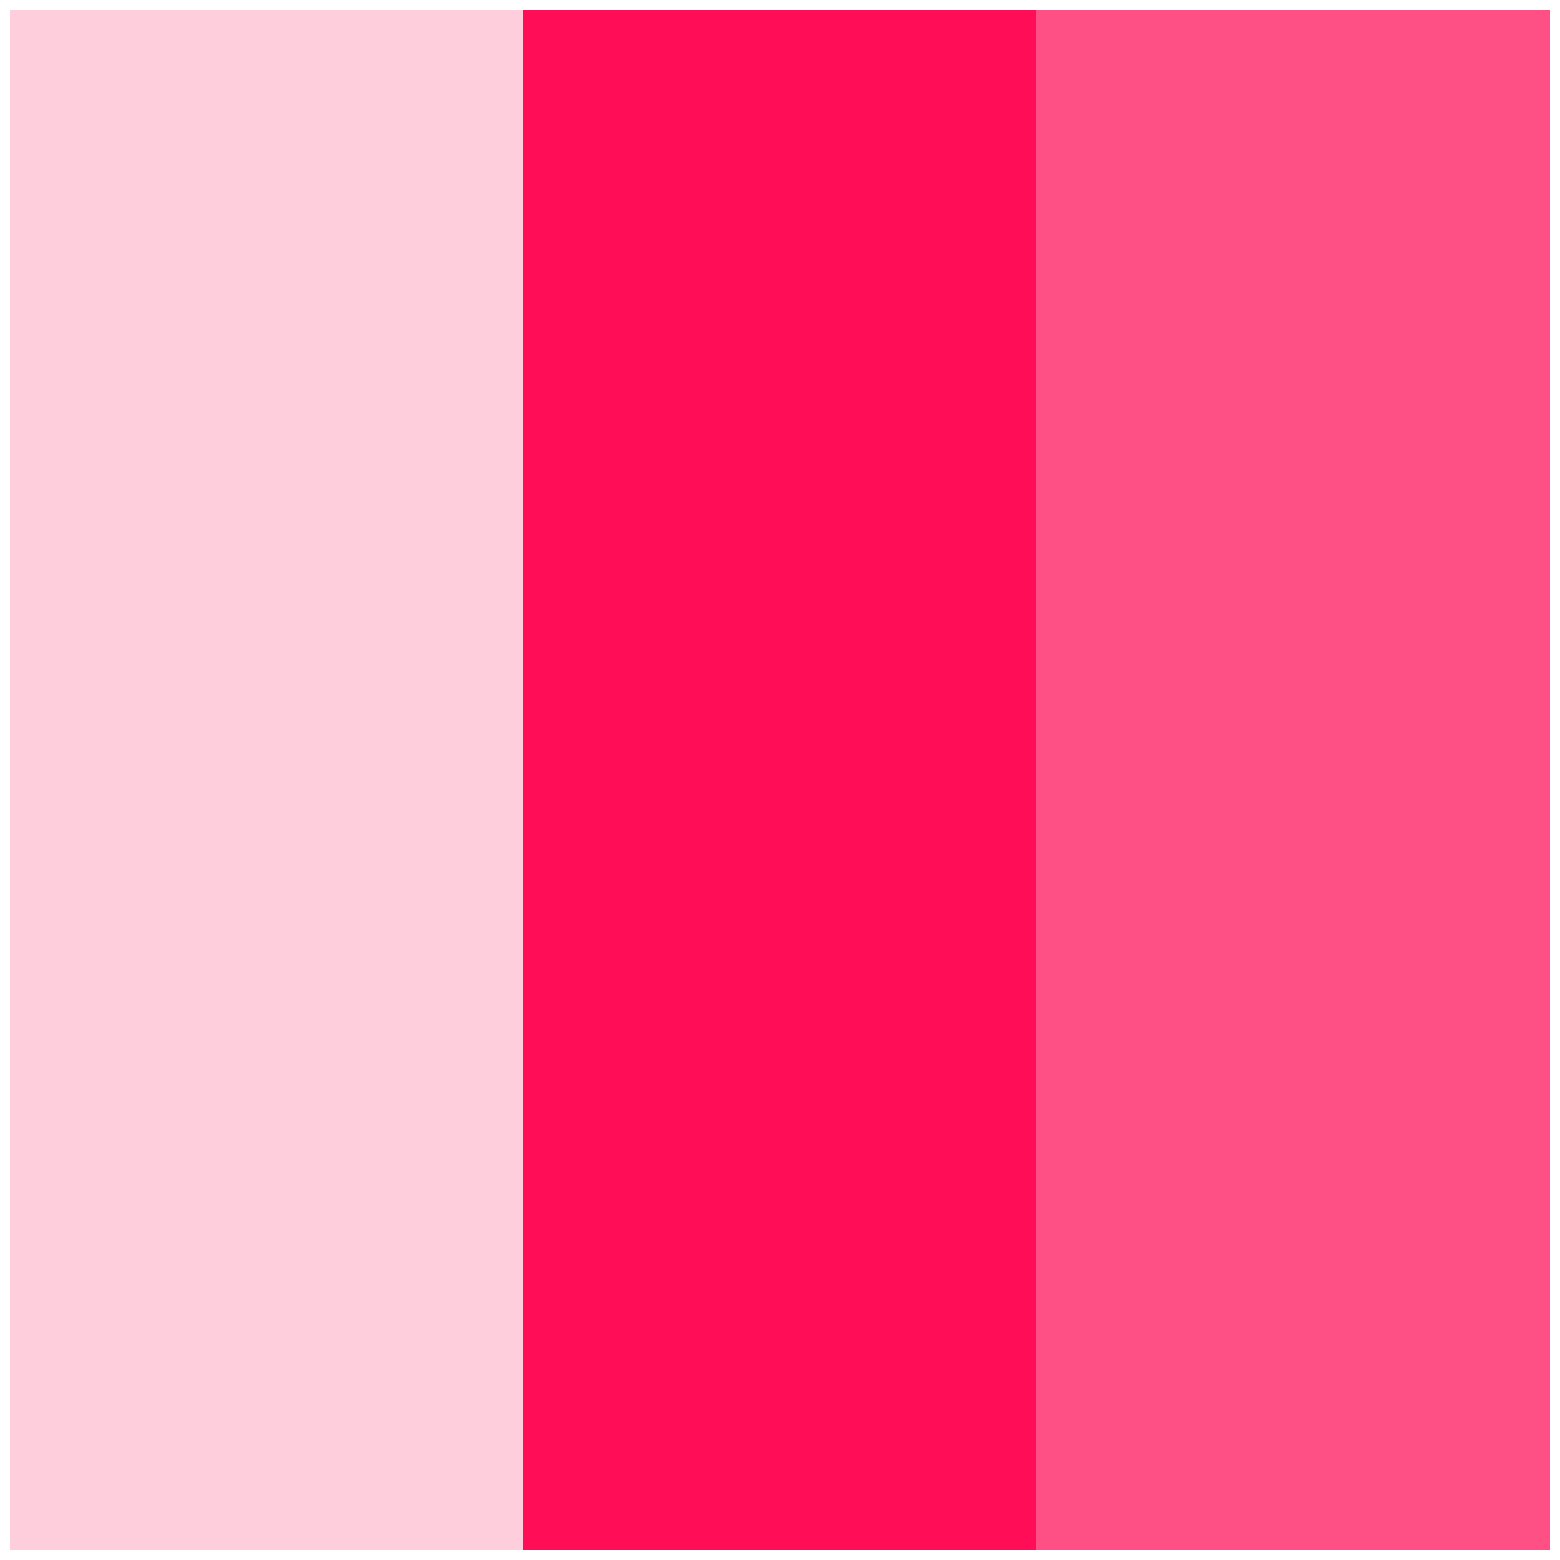

In [61]:
plt.figure(figsize=(20, 20))
plt.imshow(val, cmap=red_transparent_blue, vmin=-np.nanpercentile(exp_result[0], 99.9),vmax=np.nanpercentile(exp_result[0], 99.9))
plt.axis('off')
plt.savefig('layer1.svg')

# Background

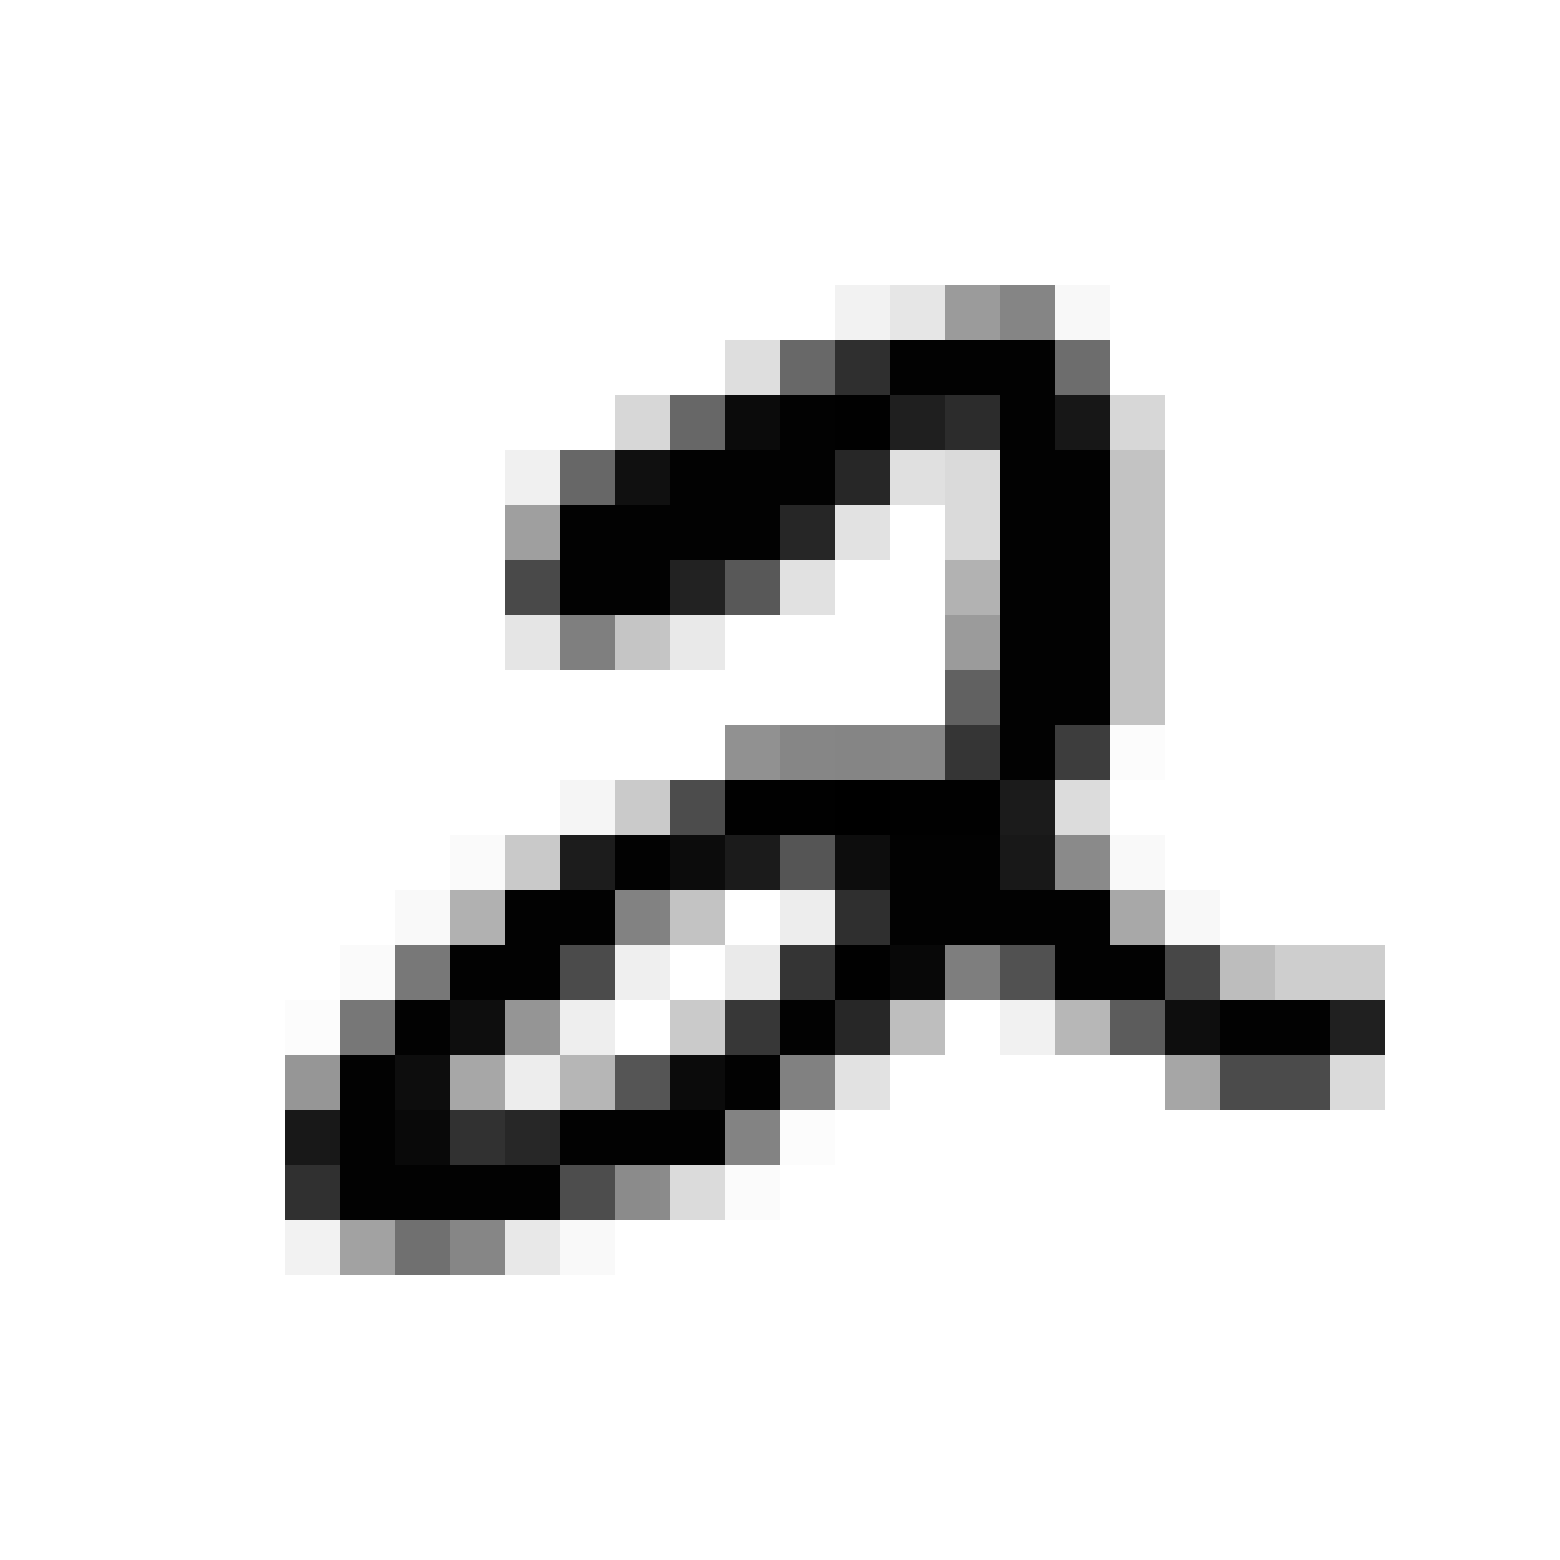

In [66]:
plt.figure(figsize=(20, 20))
plt.imshow(mnist.X[img_ID].reshape(28, 28), cmap="gray_r")
plt.axis('off')
plt.savefig('background.svg')